# Load cloudtrail logs into Juypter for analysis with Pandas and Timesketch.
The goal of this notebook is to load the cloud trail logs that Scott Piper has made available from here: http://summitroute.com/downloads/flaws_cloudtrail_logs.tar into a Juypter notebook to analyze with Pandas and upload to Timesketch. You can read more about the logs on Scott Piper's blog at Summit Route: https://summitroute.com/blog/2020/10/09/public_dataset_of_cloudtrail_logs_from_flaws_cloud/

The code below is heavily inspired by (stolen, really) from code that the google team made available here: https://github.com/google/timesketch/blob/master/notebooks/Stolen_Szechuan_Sauce_Data_Upload.ipynb

In [2]:
# @title Import libraries
# @markdown This cell loads libraries that we will use througout the notebook.
import io
import os
import codecs

import altair as alt
import numpy as np
import pandas as pd

from timesketch_api_client import config
from timesketch_import_client import helper
from timesketch_import_client import importer



Forgot to install picatrix. Probably go back and do all the installs in this notebook for documentation sake.

In [4]:
!pip -q install picatrix

Setup where to get one of the logs from.

In [10]:
# @markdown This needs to be changed to reflect the correct path.

PATH_TO_FOLDER = '../data/logs/flaws_cloudtrail_logs' # @param {type: "string"}
# @markdown the path to the folder will be used for all subsequent paths
# @markdown as a root folder.
CLOUDTRAIL_LOG_FILENAME = 'flaws_cloudtrail00.json' # @param {type: "string"}

PATH_TO_JSON = os.path.join(PATH_TO_FOLDER, CLOUDTRAIL_LOG_FILENAME)



Read in the logs.

In [12]:
df = None
with codecs.open(PATH_TO_JSON, 'r', encoding='utf-8', errors='replace') as fh:
  df = pd.read_json(fh)

print(df.shape)

(100000, 1)


In [14]:
df.head(1)

Records
0  {'userAgent': '[S3Console/0.4]', 'eventID': '3...

In [15]:
df["Records"]

0        {'userAgent': '[S3Console/0.4]', 'eventID': '3...
1        {'userAgent': 'console.amazonaws.com', 'eventI...
2        {'userAgent': 'console.amazonaws.com', 'eventI...
3        {'userAgent': 'console.amazonaws.com', 'eventI...
4        {'userAgent': 'console.amazonaws.com', 'eventI...
                               ...                        
99995    {'userAgent': 'Boto3/1.7.4 Python/2.7.12 Linux...
99996    {'userAgent': 'Boto3/1.7.4 Python/2.7.12 Linux...
99997    {'userAgent': 'ec2.amazonaws.com', 'eventID': ...
99998    {'userAgent': 'Boto3/1.7.4 Python/2.7.12 Linux...
99999    {'userAgent': 'Boto3/1.7.4 Python/2.7.12 Linux...
Name: Records, Length: 100000, dtype: object

So, I don't think this is quite what I was after there is only one Column for "Records", but after a bit of googling, I came across and answer that looks promising on stack overflow: https://stackoverflow.com/questions/64159412/how-to-read-aws-cloudtrail-json-logs-into-a-pandas-dataframe.
I am trying just the json_normalize below.

In [16]:
df = None
with codecs.open(PATH_TO_JSON, 'r', encoding='utf-8', errors='replace') as fh:
  df = pd.json_normalize(fh)

print(df.shape)

KeyboardInterrupt: 

In [17]:
df = None
with codecs.open(PATH_TO_JSON, 'r', encoding='utf-8', errors='replace') as fh:
  df = pd.json_normalize(fh, 'Records', sep="_")

print(df.shape)

TypeError: string indices must be integers

In [20]:
import json

df = None

with open(PATH_TO_JSON) as f:
    jf = json.loads(f.read())
    df = pd.json_normalize(jf, "Records", sep="_")

print(df.shape)

(100000, 642)


In [21]:
df.head(3)


userAgent                               eventID   eventType  \
0        [S3Console/0.4]  3038ebd2-c98a-4c65-9b6e-e22506292313  AwsApiCall   
1  console.amazonaws.com  22a0d9b1-deea-4d39-827b-2af7050ed3f3  AwsApiCall   
2  console.amazonaws.com  9facf7ca-cb76-4b19-940c-3de6803f7efb  AwsApiCall   

   sourceIPAddress                 eventName        eventSource  \
0  255.253.125.115               ListBuckets   s3.amazonaws.com   
1  255.253.125.115  GetAccountPasswordPolicy  iam.amazonaws.com   
2  255.253.125.115         GetAccountSummary  iam.amazonaws.com   

  recipientAccountId  requestParameters  awsRegion  \
0       811596193553                NaN  us-east-1   
1       811596193553                NaN  us-east-1   
2       811596193553                NaN  us-east-1   

                               requestID  ...  requestParameters_responseType  \
0                       83A6C73FE87F51FF  ...                             NaN   
1   b833be53-f15d-11e6-8abe-9409ef6d52ab  ...                             NaN   
2  b110697b2-f15d-11e6-8abe-9409ef6d52ab  ...                             NaN   

  requestParameters_names responseElements_sslPolicies  \
0                     NaN                          NaN   
1                     NaN                          NaN   
2                     NaN                          NaN   

  requestParameters_noReboot requestParameters_encryption  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   

  requestParameters_sourceImageId  \
0                             NaN   
1                             NaN   
2                             NaN   

  requestParameters_WebsiteConfiguration_ErrorDocument_Key  \
0                                                NaN         
1                                                NaN         
2                                                NaN         

  requestParameters_subnetSet_items additionalEventData_AFAUsed  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   

  requestParameters_tagSpecificationSet_items  
0                                         NaN  
1                                         NaN  
2                                         NaN  

[3 rows x 642 columns]

In [23]:
df['userAgent']

0                                          [S3Console/0.4]
1                                    console.amazonaws.com
2                                    console.amazonaws.com
3                                    console.amazonaws.com
4                                    console.amazonaws.com
                               ...                        
99995    Boto3/1.7.4 Python/2.7.12 Linux/4.4.0-119-gene...
99996    Boto3/1.7.4 Python/2.7.12 Linux/4.4.0-119-gene...
99997                                    ec2.amazonaws.com
99998    Boto3/1.7.4 Python/2.7.12 Linux/4.4.0-119-gene...
99999    Boto3/1.7.4 Python/2.7.12 Linux/4.4.0-119-gene...
Name: userAgent, Length: 100000, dtype: object

In [24]:
df.keys()


Index(['userAgent', 'eventID', 'eventType', 'sourceIPAddress', 'eventName',
       'eventSource', 'recipientAccountId', 'requestParameters', 'awsRegion',
       'requestID',
       ...
       'requestParameters_responseType', 'requestParameters_names',
       'responseElements_sslPolicies', 'requestParameters_noReboot',
       'requestParameters_encryption', 'requestParameters_sourceImageId',
       'requestParameters_WebsiteConfiguration_ErrorDocument_Key',
       'requestParameters_subnetSet_items', 'additionalEventData_AFAUsed',
       'requestParameters_tagSpecificationSet_items'],
      dtype='object', length=642)

In [30]:
for key in df.keys():
    if key.startswith('user'):
        print(key)

userAgent
userIdentity_type
userIdentity_principalId
userIdentity_arn
userIdentity_accountId
userIdentity_sessionContext_attributes_mfaAuthenticated
userIdentity_sessionContext_attributes_creationDate
userIdentity_accessKeyId
userIdentity_userName
userIdentity_invokedBy
userIdentity_sessionContext_sessionIssuer_type
userIdentity_sessionContext_sessionIssuer_principalId
userIdentity_sessionContext_sessionIssuer_arn
userIdentity_sessionContext_sessionIssuer_accountId
userIdentity_sessionContext_sessionIssuer_userName


In [32]:
df['userIdentity_type'].value_counts()

IAMUser        58416
AssumedRole    18604
AWSService     15029
Root            7703
AWSAccount       248
Name: userIdentity_type, dtype: int64

Ok, looks like we have one file loaded. Let's go for broke and try to add them all, based on the stackoverflow article and see if my laptop crashes.

Let's actually try to open one of the zip files. So we don't have to unzip all of them. 

In [33]:
# @markdown This needs to be changed to reflect the correct path.

PATH_TO_FOLDER = '../data/logs/flaws_cloudtrail_logs' # @param {type: "string"}
# @markdown the path to the folder will be used for all subsequent paths
# @markdown as a root folder.
CLOUDTRAIL_LOG_FILENAME = 'flaws_cloudtrail01.json.gz' # @param {type: "string"}

PATH_TO_JSON = os.path.join(PATH_TO_FOLDER, CLOUDTRAIL_LOG_FILENAME)

In [36]:
import zipfile

df = None

with zipfile.ZipFile(PATH_TO_JSON):
    with open(f"{PATH_TO_JSON}[:-3]") as f:
        jf = json.loads(f.read())
        df = pd.json_normalize(jf, "Records", sep="_")
    
print(df.shape)

BadZipFile: File is not a zip file

In [41]:
import gzip

df = None

with gzip.open(PATH_TO_JSON) as f:
    jf = json.loads(f.read())
    df = pd.json_normalize(jf, "Records", sep="_")
    
print(df.shape)

(100000, 341)


In [42]:
df.head(3)

userAgent  \
0  Boto3/1.7.4 Python/2.7.12 Linux/4.4.0-119-gene...   
1  Boto3/1.7.4 Python/2.7.12 Linux/4.4.0-119-gene...   
2  Boto3/1.7.4 Python/2.7.12 Linux/4.4.0-119-gene...   

                                eventID  \
0  debce1e0-4596-4b6f-8ede-52d360904e07   
1  8e4af6c3-29d3-4fa7-8d67-7d9271ebfe3b   
2  258e4b30-73a6-45a4-816e-50d27cfd0ff5   

                                        errorMessage   eventType  \
0  You are not authorized to perform this operation.  AwsApiCall   
1  You are not authorized to perform this operation.  AwsApiCall   
2  You are not authorized to perform this operation.  AwsApiCall   

                      errorCode sourceIPAddress         eventName  \
0  Client.UnauthorizedOperation   155.63.17.217  CreateDefaultVpc   
1  Client.UnauthorizedOperation   155.63.17.217  CreateDefaultVpc   
2  Client.UnauthorizedOperation   155.63.17.217  CreateDefaultVpc   

         eventSource recipientAccountId  awsRegion  ...  \
0  ec2.amazonaws.com       811596193553  us-west-1  ...   
1  ec2.amazonaws.com       811596193553  sa-east-1  ...   
2  ec2.amazonaws.com       811596193553  us-east-1  ...   

  requestParameters_budgetName  responseElements_notifications  \
0                          NaN                             NaN   
1                          NaN                             NaN   
2                          NaN                             NaN   

  requestParameters_notification_notificationType  \
0                                             NaN   
1                                             NaN   
2                                             NaN   

  requestParameters_notification_comparisonOperator  \
0                                               NaN   
1                                               NaN   
2                                               NaN   

  requestParameters_notification_threshold  \
0                                      NaN   
1                                      NaN   
2                                      NaN   

  requestParameters_notification_notificationState  \
0                                              NaN   
1                                              NaN   
2                                              NaN   

  requestParameters_keySet_items requestParameters_filter  \
0                            NaN                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   

  requestParameters_flatten requestParameters_modelName  
0                       NaN                         NaN  
1                       NaN                         NaN  
2                       NaN                         NaN  

[3 rows x 341 columns]

In [43]:
df['userIdentity_type'].value_counts()

IAMUser        87213
AWSService      7986
AssumedRole     2443
Root            2311
AWSAccount        46
Name: userIdentity_type, dtype: int64

In [46]:
df['userIdentity_arn'] == 'arn:aws:iam::811596193553:user/Level6'

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: userIdentity_arn, Length: 100000, dtype: bool

No quite, what I wanted. I ran into this the other day and ended up with something that looked like this: df[df.stack().str.contains("coreupdate").any(level=0)]
but, I think what I needed was more like what is below. And as per usual I found it on stackoverflow.
https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values

In [49]:
df.loc[df['userIdentity_arn'] == "arn:aws:iam::811596193553:user/Level6"]

userAgent  \
3254   aws-cli/1.15.4 Python/2.7.14+ Linux/4.14.0-kal...   
3255   aws-cli/1.11.13 Python/3.5.2 Linux/4.13.0-38-g...   
3256   aws-cli/1.11.13 Python/3.5.2 Linux/4.13.0-38-g...   
3257   aws-cli/1.11.13 Python/3.5.2 Linux/4.13.0-38-g...   
3389   aws-cli/1.15.4 Python/2.7.14+ Linux/4.14.0-kal...   
...                                                  ...   
99948  aws-cli/1.16.84 Python/3.6.8 Linux/4.18.0-kali...   
99949  aws-cli/1.16.84 Python/3.6.8 Linux/4.18.0-kali...   
99950  aws-cli/1.16.84 Python/3.6.8 Linux/4.18.0-kali...   
99951  aws-cli/1.16.84 Python/3.6.8 Linux/4.18.0-kali...   
99952  aws-cli/1.16.84 Python/3.6.8 Linux/4.18.0-kali...   

                                     eventID errorMessage   eventType  \
3254    37b484d5-c365-4424-ad4d-b41ecd6d1792          NaN  AwsApiCall   
3255   eb1f15fb-4b6a-44ae-9159-537750cb613fb          NaN  AwsApiCall   
3256    53af5c0c-d179-41a9-a4c8-2e7c9317f2d8          NaN  AwsApiCall   
3257     684211c61-a9fe-429a-8665-082848f8a1          NaN  AwsApiCall   
3389    a8e39c60-ef22-4fff-b8db-3a931f1995a6          NaN  AwsApiCall   
...                                      ...          ...         ...   
99948   6cc6a5d7-323f-4aea-8f91-022e2da0fe01          NaN  AwsApiCall   
99949   180e2569-cec5-4b6a-9854-64ac414f2b59          NaN  AwsApiCall   
99950  9bd1e0ee-0fb5-4af9-b8b0-aa243425ea7ea          NaN  AwsApiCall   
99951   78a63bcb-3dcb-442d-bf02-1c435cfd658f          NaN  AwsApiCall   
99952   911b3d99-3361-4a4a-8ca5-edeb24b77523          NaN  AwsApiCall   

      errorCode  sourceIPAddress                       eventName  \
3254        NaN       2.3.149.35  GetAccountAuthorizationDetails   
3255        NaN      252.5.226.0                         GetUser   
3256        NaN      252.5.226.0        ListAttachedUserPolicies   
3257        NaN      252.5.226.0                       GetPolicy   
3389        NaN       2.3.149.35                         GetUser   
...         ...              ...                             ...   
99948       NaN  143.252.238.253                GetPolicyVersion   
99949       NaN  143.252.238.253                GetPolicyVersion   
99950       NaN  143.252.238.253             ListFunctions202224   
99951       NaN  143.252.238.253               GetPolicy202224v2   
99952       NaN  143.252.238.253                       GetStages   

                    eventSource recipientAccountId  awsRegion  ...  \
3254          iam.amazonaws.com       811596193553  us-east-1  ...   
3255          iam.amazonaws.com       811596193553  us-east-1  ...   
3256          iam.amazonaws.com       811596193553  us-east-1  ...   
3257          iam.amazonaws.com       811596193553  us-east-1  ...   
3389          iam.amazonaws.com       811596193553  us-east-1  ...   
...                         ...                ...        ...  ...   
99948         iam.amazonaws.com       811596193553  us-east-1  ...   
99949         iam.amazonaws.com       811596193553  us-east-1  ...   
99950      lambda.amazonaws.com       811596193553  us-west-2  ...   
99951      lambda.amazonaws.com       811596193553  us-west-2  ...   
99952  apigateway.amazonaws.com       811596193553  us-west-2  ...   

      requestParameters_budgetName  responseElements_notifications  \
3254                           NaN                             NaN   
3255                           NaN                             NaN   
3256                           NaN                             NaN   
3257                           NaN                             NaN   
3389                           NaN                             NaN   
...                            ...                             ...   
99948                          NaN                             NaN   
99949                          NaN                             NaN   
99950                          NaN                             NaN   
99951                          NaN                             NaN   
99952                

In [50]:
df.loc[df['userIdentity_arn'] == "arn:aws:iam::811596193553:user/Level6"] & df.loc[df['sourceipaddress'] == "5.205.62.253"]

KeyError: 'sourceipaddress'

In [52]:
for k in df.keys():
    if k.startswith("source"):
        print(k)

sourceIPAddress


In [54]:
df.loc[(df['userIdentity_arn'] == "arn:aws:iam::811596193553:user/Level6")] & df.loc[(df['sourceIPAddress'] == "5.205.62.253")]

TypeError: unsupported operand type(s) for &: 'float' and 'bool'

In [55]:
df.loc[(df['userIdentity_arn'] == "arn:aws:iam::811596193553:user/Level6") & (df['sourceIPAddress'] == "5.205.62.253")]

Empty DataFrame
Columns: [userAgent, eventID, errorMessage, eventType, errorCode, sourceIPAddress, eventName, eventSource, recipientAccountId, awsRegion, requestID, responseElements, eventVersion, eventTime, userIdentity_type, userIdentity_principalId, userIdentity_arn, userIdentity_accountId, userIdentity_accessKeyId, userIdentity_userName, userIdentity_sessionContext_attributes_mfaAuthenticated, userIdentity_sessionContext_attributes_creationDate, requestParameters_instancesSet_items, requestParameters_userData, requestParameters_instanceType, requestParameters_monitoring_enabled, requestParameters_disableApiTermination, requestParameters_tagSpecificationSet_items, requestParameters_blockDeviceMapping_items, requestParameters, responseElements_userId, responseElements_account, responseElements_arn, sharedEventID, resources, userIdentity_invokedBy, requestParameters_roleSessionName, requestParameters_roleArn, responseElements_credentials_sessionToken, responseElements_credentials_accessKeyId, responseElements_credentials_expiration, apiVersion, userIdentity_sessionContext_sessionIssuer_type, userIdentity_sessionContext_sessionIssuer_principalId, userIdentity_sessionContext_sessionIssuer_arn, userIdentity_sessionContext_sessionIssuer_accountId, userIdentity_sessionContext_sessionIssuer_userName, requestParameters_logGroupName, requestParameters_logStreamName, responseElements_assumedRoleUser_assumedRoleId, responseElements_assumedRoleUser_arn, requestParameters_maxResults, requestParameters_ownersSet_items, requestParameters_snapshotId, requestParameters_zone, requestParameters_nextToken, requestParameters_userName, requestParameters_policyArn, requestParameters_versionId, requestParameters_functionName, readOnly, requestParameters_restApiId, requestParameters_template, requestParameters_sourceRegion, requestParameters_sourceSnapshotId, requestParameters_destinationRegion, requestParameters_presignedUrl, requestParameters_includeAllInstances, requestParameters_snapshotSet_items, requestParameters_iamUserArn, requestParameters_onlyAttached, requestParameters_marker, requestParameters_roleName, requestParameters_policyName, requestParameters_pathPrefix, requestParameters_filterSet_items, requestParameters_bucketName, requestParameters_location, requestParameters_durationSeconds, requestParameters_serialNumber, requestParameters_imagesSet_items, requestParameters_awsActId, requestParameters_payerId, requestParameters_userArn, responseElements_configRules, requestParameters_name, requestParameters_resourceId, requestParameters_responseType, requestParameters_policy, requestParameters_acl, requestParameters_attributeType, requestParameters_keyName, requestParameters_requestContext_awsAccountId, responseElements_workspaces, requestParameters_instanceId, requestParameters_attribute, requestParameters_createVolumePermission_add_items, requestParameters_imageId, additionalEventData_MobileVersion, additionalEventData_MFAUsed, ...]
Index: []

[0 rows x 341 columns]

Ok, so that is selecting by 2 columns. What I want to do is work with the example that is give at the bottom of https://summitroute.com/blog/2020/10/09/public_dataset_of_cloudtrail_logs_from_flaws_cloud/ in sql code. The sql code looks like this:




In [18]:
SELECT 
  eventname, 
  count(*) AS eventcount 
FROM cloudtrail_logs WHERE 
  useridentity.arn = 'arn:aws:iam::811596193553:user/Level6' 
  AND sourceipaddress='5.205.62.253'
GROUP BY eventname ORDER BY eventcount DESC;

IndentationError: unexpected indent (<ipython-input-18-5e6da8d61541>, line 2)

The goal would be to get the same result in Pandas. I think will have to load all the data to do it. So we'll see how that goes.

In [1]:
# This will try to load more data into memory than your laptop can hold and it will crash.
#awsc_list = list()

#df = None

#log_files = os.listdir(PATH_TO_FOLDER)

#for log_file in log_files:
#    PATH_TO_JSON = os.path.join(PATH_TO_FOLDER, log_file)
#    with gzip.open(PATH_TO_JSON) as f:
#        jf = json.loads(f.read())
    
    #awsc_list.append(pd.json_normalize(jf, "Records", sep="_"))

#df = pd.concat(awsc_list).reset_index(drop=True)
    
#print(df.shape)

So... I just don't have enough memory in my computer to load all the files at once. I think the next thing for me to do is to load them into timesketch and then I can query them from timesketch and get back smaller more managable files to work with. That said I will try one more time to open each file and run a the filter for IP and useridentity to see if I can identify which files are interseting.

In [3]:
# @markdown This needs to be changed to reflect the correct path.

PATH_TO_FOLDER = '../data/logs/flaws_cloudtrail_logs' # @param {type: "string"}
# @markdown the path to the folder will be used for all subsequent paths
# @markdown as a root folder.
CLOUDTRAIL_LOG_FILENAME = 'flaws_cloudtrail00.json' # @param {type: "string"}

PATH_TO_JSON = os.path.join(PATH_TO_FOLDER, CLOUDTRAIL_LOG_FILENAME)

In [8]:
import gzip
import json

df = None

log_files = os.listdir(PATH_TO_FOLDER)

for log_file in log_files:
    df = None
    PATH_TO_JSON = os.path.join(PATH_TO_FOLDER, log_file)
    with gzip.open(PATH_TO_JSON) as f:
        jf = json.loads(f.read())
    
    df = pd.json_normalize(jf, "Records", sep="_")
    df.loc[(df['userIdentity_arn'] == "arn:aws:iam::811596193553:user/Level6") & (df['sourceIPAddress'] == "5.205.62.253")]
    

#df = pd.concat(awsc_list).reset_index(drop=True)
    
#print(df.shape)

Whelp... I thought I would at least get some hits... but at least I didn't crash my computer...

So, I want to at least verify my filter thing. So I uncompressed all the log files and grepped for the ones with the IP.

In [9]:
!grep -Rl "5.205.62.253" ../data/logs/flaws_cloudtrail_logs/uncompressed

../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail14.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail03.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail12.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail13.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail07.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail15.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail04.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail10.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail09.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail11.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail17.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail05.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail06.json
../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail

Ok, so I am going to pick one of these files and see if I can get the filter to match.

In [4]:
import json
import pandas as pd
import numpy as np
import altair as alt

FILE = "../data/logs/flaws_cloudtrail_logs/uncompressed/flaws_cloudtrail16.json"

with open(FILE) as f:
    jf = json.loads(f.read())

df = pd.json_normalize(jf, "Records", sep="_")

print(df.shape)


    


(100000, 99)


In [17]:
df.loc[(df['userIdentity_arn'] == "arn:aws:iam::811596193553:user/Level6") & (df['sourceIPAddress'] == "5.205.62.253")]

userAgent  \
0      Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
1      Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
3      Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
5      Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
6      Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
...                                                  ...   
99991  Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
99992  Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
99993  Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
99994  Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
99999  Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   

                                    eventID  \
0      2e3fab5f-5252-4bfd-a432-1f7dad6fe1f8   
1      376a64b2-a3b6-4ff2-8768-38f69ebfef0a   
3      376a64b2-a3b6-4ff2-8768-38f69ebfef0a   
5      cf0238f6-29f4-4500-9e64-11eefd88c244   
6      91c76709-f48a-4666-919c-560699a195e6   
...                                     ...   
99991  5c1b91c0-96d1-4b5b-8825-fefa2a2d6ea1   
99992  eee661fe-c1d3-4664-89a2-5e0c656a8427   
99993  9ff0e056-dde7-44ae-ad2b-e83a7c030cc9   
99994  68f7348f-9983-43ba-86f6-eda253296a74   
99999  6b22374b-a84d-4dff-9f4c-cf530a887480   

                                            errorMessage   eventType  \
0      The requested configuration is currently not s...  AwsApiCall   
1      The requested configuration is currently not s...  AwsApiCall   
3      The requested configuration is currently not s...  AwsApiCall   
5      You are not authorized to perform this operati...  AwsApiCall   
6                                Request limit exceeded.  AwsApiCall   
...                                                  ...         ...   
99991                            Request limit exceeded.  AwsApiCall   
99992  You are not authorized to perform this operati...  AwsApiCall   
99993                            Request limit exceeded.  AwsApiCall   
99994                            Request limit exceeded.  AwsApiCall   
99999                            Request limit exceeded.  AwsApiCall   

                          errorCode sourceIPAddress     eventName  \
0                Client.Unsupported    5.205.62.253  RunInstances   
1                Client.Unsupported    5.205.62.253  RunInstances   
3                Client.Unsupported    5.205.62.253  RunInstances   
5      Client.UnauthorizedOperation    5.205.62.253  RunInstances   
6       Client.RequestLimitExceeded    5.205.62.253  RunInstances   
...                             ...             ...           ...   
99991   Client.RequestLimitExceeded    5.205.62.253  RunInstances   
99992  Client.UnauthorizedOperation    5.205.62.253  RunInstances   
99993   Client.RequestLimitExceeded    5.205.62.253  RunInstances   
99994   Client.RequestLimitExceeded    5.205.62.253  RunInstances   
99999   Client.RequestLimitExceeded    5.205.62.253  RunInstances   

             eventSource recipientAccountId       awsRegion  ...  \
0      ec2.amazonaws.com       811596193553       sa-east-1  ...   
1      ec2.amazonaws.com       811596193553  ap-northeast-2  ...   
3      ec2.amazonaws.com       811596193553  ap-northeast-2  ...   
5      ec2.amazonaws.com       811596193553  ap-northeast-2  ...   
6      ec2.amazonaws.com       811596193553  ap-northeast-2  ...   
...                  ...                ...             ...  ...   
99991  ec2.amazonaws.com       811596193553      ap-south-1  ...   
99992  ec2.amazonaws.com       811596193553      ap-south-1  ...   
99993  ec2.amazonaws.com       811596193553       us-west-2  ...   
99994  ec2.amazonaws.com       811596193553      ap-south-1  ...   
99999  ec2.amazonaws.com       811596193553       us-west-2  ...   

      requestParameters_notificationsWithSubscribers  \
0                                                NaN   
1                                                NaN   
3                                                NaN   
5                         

Hey! We got some hits.

In [24]:
SQL = """
SELECT 
  eventname, 
  count(*) AS eventcount 
FROM cloudtrail_logs WHERE 
  useridentity.arn = 'arn:aws:iam::811596193553:user/Level6' 
  AND sourceipaddress='5.205.62.253'
GROUP BY eventname ORDER BY eventcount DESC;
"""

filtered_df = df.loc[(df['userIdentity_arn'] == "arn:aws:iam::811596193553:user/Level6") & (df['sourceIPAddress'] == "5.205.62.253")]

       
filtered_df['eventName'].value_counts()

RunInstances            51275
GetCallerIdentity         166
DescribeInstances         163
CreateDefaultVpc          161
DescribeKeyPairs          154
CreateKeyPair             154
ListRoles                   2
CreateRole                  2
GetFunction202224v2         2
CreateFunction202224        1
Name: eventName, dtype: int64

Ok, if I am reading the SQL right (big, if) then I think this works for one of the files. The next thing would be to load them into elastic. Pull them back and do the same thing and see if the results match up with the Athena query.

In [25]:
df['eventName'].value_counts()

RunInstances                           98179
GetCallerIdentity                        331
DescribeInstances                        327
CreateDefaultVpc                         314
CreateKeyPair                            307
DescribeKeyPairs                         307
DescribeTrails                            37
DescribeConfigurationRecorderStatus       30
LookupEvents                              30
DescribeConfigurationRecorders            30
ListFunctions202224                       17
AssumeRole                                16
ListBuckets                                8
DescribeTags                               7
GetTrailStatus                             4
DescribeBudgets                            4
DescribeVolumes                            4
DescribeVolumeStatus                       4
GetAccountPasswordPolicy                   2
ListAccountAliases                         2
ListKeys                                   2
DescribeImages                             2
DescribeAv

So there are all the event names in this file.

In [28]:
df.loc[df["eventName"] == "ListBuckets"]

userAgent  \
17992  [aws-cli/1.16.140 Python/3.7.3 Darwin/17.7.0 b...   
17995  [aws-cli/1.16.140 Python/3.7.3 Darwin/17.7.0 b...   
25336  [aws-cli/1.16.223 Python/3.6.8 Linux/5.0.0-25-...   
25340  [aws-cli/1.16.223 Python/3.6.8 Linux/5.0.0-25-...   
29139  [aws-cli/1.16.223 Python/3.6.8 Linux/5.0.0-25-...   
29144  [aws-cli/1.16.223 Python/3.6.8 Linux/5.0.0-25-...   
33448  [AWSCloudTrail, aws-internal/3 aws-sdk-java/1....   
33456  [AWSCloudTrail, aws-internal/3 aws-sdk-java/1....   

                                     eventID errorMessage   eventType  \
17992   34b6eda8-f09a-4312-89f6-da54d4a8dc45          NaN  AwsApiCall   
17995   34b6eda8-f09a-4312-89f6-da54d4a8dc45          NaN  AwsApiCall   
25336   d35b20f4-2864-42e1-9630-dbbe9afe8044          NaN  AwsApiCall   
25340   d35b20f4-2864-42e1-9630-dbbe9afe8044          NaN  AwsApiCall   
29139   886ea387-6625-42bb-b0d8-3cbc10a02751          NaN  AwsApiCall   
29144   886ea387-6625-42bb-b0d8-3cbc10a02751          NaN  AwsApiCall   
33448   ce334e50-b2ee-4ab8-8feb-af9a7f73b27d          NaN  AwsApiCall   
33456  4b180413b-7159-4aea-a7b2-672b97d8e4d8          NaN  AwsApiCall   

      errorCode sourceIPAddress    eventName       eventSource  \
17992       NaN  53.242.161.252  ListBuckets  s3.amazonaws.com   
17995       NaN  53.242.161.252  ListBuckets  s3.amazonaws.com   
25336       NaN   47.218.131.16  ListBuckets  s3.amazonaws.com   
25340       NaN   47.218.131.16  ListBuckets  s3.amazonaws.com   
29139       NaN   47.218.131.16  ListBuckets  s3.amazonaws.com   
29144       NaN   47.218.131.16  ListBuckets  s3.amazonaws.com   
33448       NaN    8.70.237.250  ListBuckets  s3.amazonaws.com   
33456       NaN      158.2.1.28  ListBuckets  s3.amazonaws.com   

      recipientAccountId  awsRegion  ...  \
17992       811596193553  us-east-1  ...   
17995       811596193553  us-east-1  ...   
25336       811596193553  us-west-2  ...   
25340       811596193553  us-west-2  ...   
29139       811596193553  us-west-2  ...   
29144       811596193553  us-west-2  ...   
33448       811596193553  us-west-2  ...   
33456       811596193553  us-west-2  ...   

      requestParameters_notificationsWithSubscribers  \
17992                                            NaN   
17995                                            NaN   
25336                                            NaN   
25340                                            NaN   
29139                                            NaN   
29144                                            NaN   
33448                                            NaN   
33456                                            NaN   

       responseElements_assumedRoleUser_assumedRoleId  \
17992                                             NaN   
17995                                             NaN   
25336                                             NaN   
25340                                             NaN   
29139                                             NaN   
29144                                             NaN   
33448                                             NaN   
33456                                             NaN   

      responseElements_assumedRoleUser_arn  \
17992                                  NaN   
17995                                  NaN   
25336                                  NaN   
25340                                  NaN   
29139                                  NaN   
29144                                  NaN   
33448                                  NaN   
33456                                  NaN   

      userIdentity_sessionContext_sessionIssuer_type  \
17992                                            NaN   
17995                                            NaN   
25336                                            NaN   
25340                                            NaN   
29139                                            NaN   
29144                                            NaN   
33448                         

In [36]:
filtered_df = df.loc[(df['userIdentity_arn'] == "arn:aws:iam::811596193553:user/Level6") & (df['sourceIPAddress'] == "5.205.62.253")]

bad_ip_group = filtered_df[['userIdentity_arn','sourceIPAddress', 'eventName']].groupby(
    ['sourceIPAddress','eventName'], as_index=False)

bad_ip_mytable = bad_ip_group.count()
bad_ip_mytable.rename(columns={'userIdentity_arn': 'Count'}, inplace=True)
bad_ip_mytable.sort_values(by=['Count'], ascending=False)

sourceIPAddress             eventName  Count
9    5.205.62.253          RunInstances  51275
6    5.205.62.253     GetCallerIdentity    166
4    5.205.62.253     DescribeInstances    163
0    5.205.62.253      CreateDefaultVpc    161
2    5.205.62.253         CreateKeyPair    154
5    5.205.62.253      DescribeKeyPairs    154
3    5.205.62.253            CreateRole      2
7    5.205.62.253   GetFunction202224v2      2
8    5.205.62.253             ListRoles      2
1    5.205.62.253  CreateFunction202224      1

Ok, that last bit was lifted from here: https://github.com/google/timesketch/blob/master/notebooks/Stolen_Szechuan_Sauce_Analysis.ipynb

Today, we are going to try working with some of the timeseries stuff. I found a tutorial here: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html and I am going to try to apply some of it to this data.

In [2]:
import matplotlib.pyplost as plt

ModuleNotFoundError: No module named 'matplotlib'

In [1]:
!pip -q install matplotlib

In [4]:
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [6]:
df.head(1).keys()

Index(['userAgent', 'eventID', 'errorMessage', 'eventType', 'errorCode',
       'sourceIPAddress', 'eventName', 'eventSource', 'recipientAccountId',
       'awsRegion', 'requestID', 'responseElements', 'eventVersion',
       'eventTime', 'userIdentity_type', 'userIdentity_principalId',
       'userIdentity_arn', 'userIdentity_accountId',
       'userIdentity_accessKeyId', 'userIdentity_userName',
       'requestParameters_instancesSet_items', 'requestParameters_userData',
       'requestParameters_instanceType',
       'requestParameters_monitoring_enabled',
       'requestParameters_disableApiTermination',
       'requestParameters_tagSpecificationSet_items', 'requestParameters',
       'responseElements_userId', 'responseElements_account',
       'responseElements_arn', 'requestParameters_keyName',
       'requestParameters_blockDeviceMapping_items', 'sharedEventID',
       'resources', 'userIdentity_invokedBy',
       'requestParameters_roleSessionName', 'requestParameters_roleArn',

In [7]:
df["eventTime"]

0        2019-08-23T13:00:28Z
1        2019-08-23T13:00:29Z
2        2019-08-23T13:00:29Z
3        2019-08-23T13:00:29Z
4        2019-08-23T13:00:29Z
                 ...         
99995    2019-08-24T00:20:52Z
99996    2019-08-24T00:20:52Z
99997    2019-08-24T00:20:53Z
99998    2019-08-24T00:20:53Z
99999    2019-08-24T00:20:53Z
Name: eventTime, Length: 100000, dtype: object

In [6]:
df["datetime"] = pd.to_datetime(df["eventTime"])

In [9]:
df["datetime"]

0       2019-08-23 13:00:28+00:00
1       2019-08-23 13:00:29+00:00
2       2019-08-23 13:00:29+00:00
3       2019-08-23 13:00:29+00:00
4       2019-08-23 13:00:29+00:00
                   ...           
99995   2019-08-24 00:20:52+00:00
99996   2019-08-24 00:20:52+00:00
99997   2019-08-24 00:20:53+00:00
99998   2019-08-24 00:20:53+00:00
99999   2019-08-24 00:20:53+00:00
Name: datetime, Length: 100000, dtype: datetime64[ns, UTC]

In [10]:
df["datetime"].min(), df["datetime"].max()

(Timestamp('2019-08-23 13:00:28+0000', tz='UTC'),
 Timestamp('2019-08-24 00:20:53+0000', tz='UTC'))

In [12]:
df["datetime"].max() - df["datetime"].min()

Timedelta('0 days 11:20:25')

In [13]:
df["month"] = df["datetime"].dt.month

In [14]:
df.head(2)

userAgent  \
0  Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   
1  Boto3/1.9.201 Python/2.7.12 Linux/4.4.0-159-ge...   

                                eventID  \
0  2e3fab5f-5252-4bfd-a432-1f7dad6fe1f8   
1  376a64b2-a3b6-4ff2-8768-38f69ebfef0a   

                                        errorMessage   eventType  \
0  The requested configuration is currently not s...  AwsApiCall   
1  The requested configuration is currently not s...  AwsApiCall   

            errorCode sourceIPAddress     eventName        eventSource  \
0  Client.Unsupported    5.205.62.253  RunInstances  ec2.amazonaws.com   
1  Client.Unsupported    5.205.62.253  RunInstances  ec2.amazonaws.com   

  recipientAccountId       awsRegion  ...  \
0       811596193553       sa-east-1  ...   
1       811596193553  ap-northeast-2  ...   

  responseElements_assumedRoleUser_arn  \
0                                  NaN   
1                                  NaN   

   userIdentity_sessionContext_sessionIssuer_type  \
0                                             NaN   
1                                             NaN   

  userIdentity_sessionContext_sessionIssuer_principalId  \
0                                                NaN      
1                                                NaN      

  userIdentity_sessionContext_sessionIssuer_arn  \
0                                           NaN   
1                                           NaN   

  userIdentity_sessionContext_sessionIssuer_accountId  \
0                                                NaN    
1                                                NaN    

  userIdentity_sessionContext_sessionIssuer_userName  \
0                                                NaN   
1                                                NaN   

  requestParameters_logStreamName requestParameters_logGroupName  \
0                             NaN                            NaN   
1                             NaN                            NaN   

                   datetime month  
0 2019-08-23 13:00:28+00:00     8  
1 2019-08-23 13:00:29+00:00     8  

[2 rows x 101 columns]

In [51]:
bad_ip_group = df[['userIdentity_arn','sourceIPAddress', 'eventName']].groupby(
    ['sourceIPAddress','eventName'], as_index=False)

bad_ip_mytable = bad_ip_group.count()
bad_ip_mytable.rename(columns={'userIdentity_arn': 'Count'}, inplace=True)
bad_ip_mytable.sort_values(by=['Count'], ascending=False)
type(bad_ip_group), type(bad_ip_mytable)

(pandas.core.groupby.generic.DataFrameGroupBy, pandas.core.frame.DataFrame)

In [44]:
time_group = df.groupby([df["datetime"].dt.hour, "eventName"])["sourceIPAddress"].count()
#time_group.sort_values(ascednig)
type(time_group)

pandas.core.series.Series

In [64]:
time_group = df[["datetime", "sourceIPAddress", "eventName"]].groupby(
    ["datetime", "eventName"], as_index=False)
time_table = time_group.count()
type(time_group), type(time_table)
time_table.rename(columns={"sourceIPAddress": "Count"}, inplace=True)
time_table.sort_values(by=["Count"], ascending=False)

datetime     eventName  Count
635   2019-08-23 13:10:46+00:00  RunInstances     18
516   2019-08-23 13:08:57+00:00  RunInstances     16
1056  2019-08-23 13:17:43+00:00  RunInstances     16
3875  2019-08-23 14:19:25+00:00  RunInstances     16
502   2019-08-23 13:08:42+00:00  RunInstances     16
...                         ...           ...    ...
21877 2019-08-23 21:01:16+00:00  RunInstances      1
21880 2019-08-23 21:01:21+00:00  RunInstances      1
21882 2019-08-23 21:01:24+00:00  RunInstances      1
21883 2019-08-23 21:01:25+00:00  RunInstances      1
0     2019-08-23 13:00:28+00:00  RunInstances      1

[31338 rows x 3 columns]

In [27]:
df['datetime'].dt.hour

0        13
1        13
2        13
3        13
4        13
         ..
99995     0
99996     0
99997     0
99998     0
99999     0
Name: datetime, Length: 100000, dtype: int64

In [30]:
df.count()

userAgent                                             100000
eventID                                               100000
errorMessage                                           98810
eventType                                             100000
errorCode                                              98810
                                                       ...  
userIdentity_sessionContext_sessionIssuer_userName         1
requestParameters_logStreamName                            1
requestParameters_logGroupName                             1
datetime                                              100000
month                                                 100000
Length: 101, dtype: int64

In [32]:
for k in df.keys():
    if "count" in k:
        print(k)

recipientAccountId
userIdentity_accountId
responseElements_account
requestParameters_accountId
userIdentity_sessionContext_sessionIssuer_accountId


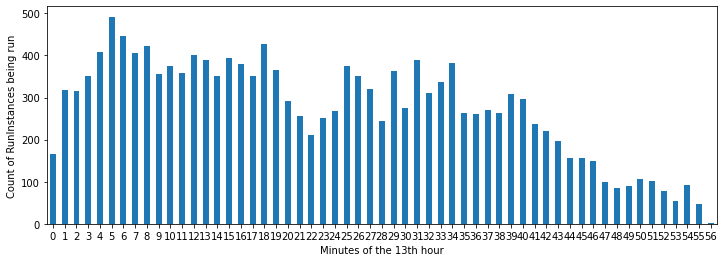

In [100]:
fig, axs = plt.subplots(figsize=(12, 4))

nf = df.loc[(df["datetime"].dt.hour == 13) & (df["eventName"] == "RunInstances")] 

nf.head()

new_group = nf[["datetime", "sourceIPAddress", "eventName"]].groupby(
    nf["datetime"].dt.minute)["eventName"].count().plot(kind='bar', rot=0, ax=axs)

plt.xlabel("Minutes of the 13th hour");  # custom x label using matplotlib
plt.ylabel("Count of RunInstances being run");




In [103]:
nf.shape


(15645, 101)

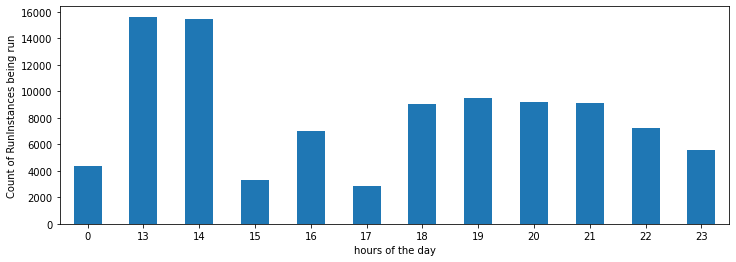

In [109]:
fig, axs = plt.subplots(figsize=(12, 4))

nf = df.loc[df["eventName"] == "RunInstances"] 

nf.head()

new_group = nf[["datetime", "sourceIPAddress", "eventName"]].groupby(
    nf["datetime"].dt.hour)["eventName"].count().plot(kind='bar', rot=0, ax=axs)

plt.xlabel("hours of the day");  # custom x label using matplotlib
plt.ylabel("Count of RunInstances being run");



Check to see if there really weren't any commands run at 2.

In [113]:
nf = df.loc[(df["datetime"].dt.hour == 2) & (df["eventName"] == "RunInstances")] 
nf.head()

Empty DataFrame
Columns: [userAgent, eventID, errorMessage, eventType, errorCode, sourceIPAddress, eventName, eventSource, recipientAccountId, awsRegion, requestID, responseElements, eventVersion, eventTime, userIdentity_type, userIdentity_principalId, userIdentity_arn, userIdentity_accountId, userIdentity_accessKeyId, userIdentity_userName, requestParameters_instancesSet_items, requestParameters_userData, requestParameters_instanceType, requestParameters_monitoring_enabled, requestParameters_disableApiTermination, requestParameters_tagSpecificationSet_items, requestParameters, responseElements_userId, responseElements_account, responseElements_arn, requestParameters_keyName, requestParameters_blockDeviceMapping_items, sharedEventID, resources, userIdentity_invokedBy, requestParameters_roleSessionName, requestParameters_roleArn, responseElements_credentials_sessionToken, responseElements_credentials_accessKeyId, responseElements_credentials_expiration, additionalEventData_SignatureVersion, additionalEventData_CipherSuite, additionalEventData_AuthenticationMethod, requestParameters_host, requestParameters_durationSeconds, additionalEventData_LoginTo, additionalEventData_MobileVersion, additionalEventData_MFAUsed, responseElements_ConsoleLogin, vpcEndpointId, additionalEventData_vpcEndpointId, userIdentity_sessionContext_attributes_mfaAuthenticated, userIdentity_sessionContext_attributes_creationDate, readOnly, requestParameters_trailNameList, requestParameters_includeShadowTrails, requestParameters_lookupAttributes, requestParameters_maxResults, requestParameters_name, requestParameters_nextToken, requestParameters_trailName, requestParameters_resourceIdList, requestParameters_bucketName, requestParameters_location, requestParameters_ownersSet_items, requestParameters_filterSet_items, apiVersion, requestParameters_pageSize, requestParameters_includeAllInstances, requestParameters_sharedUsersSet_items, requestParameters_DescribeVolumesModificationsRequest_MaxResults, requestParameters_accountId, requestParameters_budget_budgetName, requestParameters_budget_budgetLimit_amount, requestParameters_budget_budgetLimit_unit, requestParameters_budget_costTypes_useAmortized, requestParameters_budget_costTypes_includeTax, requestParameters_budget_costTypes_includeRecurring, requestParameters_budget_costTypes_includeCredit, requestParameters_budget_costTypes_includeRefund, requestParameters_budget_costTypes_useBlended, requestParameters_budget_costTypes_includeSubscription, requestParameters_budget_costTypes_includeSupport, requestParameters_budget_costTypes_includeOtherSubscription, requestParameters_budget_costTypes_includeUpfront, requestParameters_budget_timeUnit, requestParameters_budget_timePeriod_start, requestParameters_budget_timePeriod_end, requestParameters_budget_budgetType, requestParameters_notificationsWithSubscribers, responseElements_assumedRoleUser_assumedRoleId, responseElements_assumedRoleUser_arn, userIdentity_sessionContext_sessionIssuer_type, userIdentity_sessionContext_sessionIssuer_principalId, userIdentity_sessionContext_sessionIssuer_arn, userIdentity_sessionContext_sessionIssuer_accountId, userIdentity_sessionContext_sessionIssuer_userName, requestParameters_logStreamName, requestParameters_logGroupName, datetime, ...]
Index: []

[0 rows x 101 columns]

Let's see the all eventNames on a bar char.

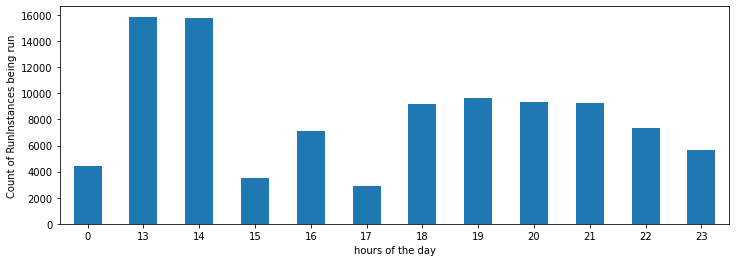

In [114]:
fig, axs = plt.subplots(figsize=(12, 4))

#nf = df.loc[df["eventName"] == "RunInstances"] 

#nf.head()

new_group = df[["datetime", "sourceIPAddress", "eventName"]].groupby(
    df["datetime"].dt.hour)["eventName"].count().plot(kind='bar', rot=0, ax=axs)

plt.xlabel("hours of the day");  # custom x label using matplotlib
plt.ylabel("Count of RunInstances being run");

<AxesSubplot:xlabel='eventName'>

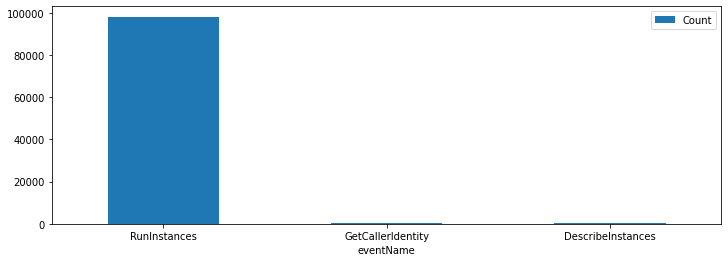

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(12, 4))

#nf = df.loc[df["eventName"] == "RunInstances"] 

#nf.head()

new_group = df[["datetime", "sourceIPAddress", "eventName"]].groupby(
    "eventName").count()

#plt.xlabel("hours of the day");  # custom x label using matplotlib
#plt.ylabel("Count of RunInstances being run");

#new_group.nlargest(10, "eventName")

new_group.rename(columns={"sourceIPAddress": "Count"}, inplace=True)

ng = new_group.drop("datetime", 1)

ng.nlargest(3, 'Count').plot(kind='bar', rot=0, ax=axs)


<AxesSubplot:xlabel='userAgent'>

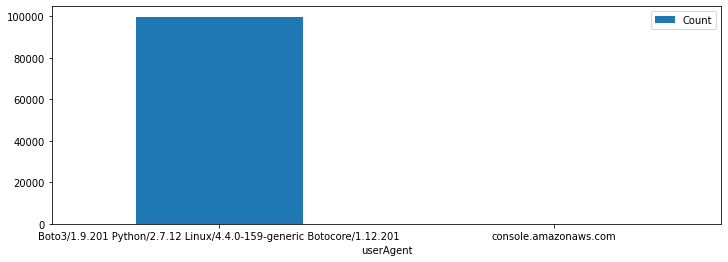

In [45]:
fig, axs = plt.subplots(figsize=(12, 4))

#nf = df.loc[df["eventName"] == "RunInstances"] 

#nf.head()

new_group = df[["datetime", "sourceIPAddress", "userAgent"]].groupby(
    "userAgent").count()

#plt.xlabel("hours of the day");  # custom x label using matplotlib
#plt.ylabel("Count of RunInstances being run");

#new_group.nlargest(10, "eventName")

new_group.rename(columns={"sourceIPAddress": "Count"}, inplace=True)

ng = new_group.drop("datetime", 1)

ng.nlargest(2, 'Count').plot(kind='bar', rot=0, ax=axs)

Attempt to run timesketch on my laptop and load the data, but this will probably crash my box and I will have to switch to a big server, but what the heck.

In [5]:
# @title Import libraries
# @markdown This cell loads libraries that we will use througout the notebook.
import io
import os
import codecs

import altair as alt
import numpy as np
import pandas as pd

from timesketch_api_client import config
from timesketch_import_client import helper
from timesketch_import_client import importer

In [6]:
# @markdown This needs to be changed to reflect the correct path.

PATH_TO_FOLDER = '../data/logs/flaws_cloudtrail_logs/uncompressed/' # @param {type: "string"}
# @markdown the path to the folder will be used for all subsequent paths
# @markdown as a root folder.
CLOUDTRAIL_LOG_FILENAME = 'flaws_cloudtrail00.json' # @param {type: "string"}

PATH_TO_JSON = os.path.join(PATH_TO_FOLDER, CLOUDTRAIL_LOG_FILENAME)

In [4]:
import json

df = None

with open(PATH_TO_JSON) as f:
    jf = json.loads(f.read())
    df = pd.json_normalize(jf, "Records", sep="_")

print(df.shape)

(100000, 642)


In [5]:
df["datetime"] = pd.to_datetime(df["eventTime"])

In [6]:
df['data_type'] = 'aws:cloudtrail:record'
df['timestamp_desc'] = 'Event Time'
df['message'] = 'cloudtrail: [' + df['eventType'] + ' - ' + df['eventName'] + ']'

In [7]:
df.head(3)

userAgent                               eventID   eventType  \
0        [S3Console/0.4]  3038ebd2-c98a-4c65-9b6e-e22506292313  AwsApiCall   
1  console.amazonaws.com  22a0d9b1-deea-4d39-827b-2af7050ed3f3  AwsApiCall   
2  console.amazonaws.com  9facf7ca-cb76-4b19-940c-3de6803f7efb  AwsApiCall   

   sourceIPAddress                 eventName        eventSource  \
0  255.253.125.115               ListBuckets   s3.amazonaws.com   
1  255.253.125.115  GetAccountPasswordPolicy  iam.amazonaws.com   
2  255.253.125.115         GetAccountSummary  iam.amazonaws.com   

  recipientAccountId  requestParameters  awsRegion  \
0       811596193553                NaN  us-east-1   
1       811596193553                NaN  us-east-1   
2       811596193553                NaN  us-east-1   

                               requestID  ...  requestParameters_encryption  \
0                       83A6C73FE87F51FF  ...                           NaN   
1   b833be53-f15d-11e6-8abe-9409ef6d52ab  ...                           NaN   
2  b110697b2-f15d-11e6-8abe-9409ef6d52ab  ...                           NaN   

  requestParameters_sourceImageId  \
0                             NaN   
1                             NaN   
2                             NaN   

  requestParameters_WebsiteConfiguration_ErrorDocument_Key  \
0                                                NaN         
1                                                NaN         
2                                                NaN         

  requestParameters_subnetSet_items additionalEventData_AFAUsed  \
0                               NaN                         NaN   
1                               NaN                         NaN   
2                               NaN                         NaN   

  requestParameters_tagSpecificationSet_items                  datetime  \
0                                         NaN 2017-02-12 19:57:06+00:00   
1                                         NaN 2017-02-12 19:59:10+00:00   
2                                         NaN 2017-02-12 19:59:10+00:00   

               data_type timestamp_desc  \
0  aws:cloudtrail:record     Event Time   
1  aws:cloudtrail:record     Event Time   
2  aws:cloudtrail:record     Event Time   

                                             message  
0             cloudtrail: [AwsApiCall - ListBuckets]  
1  cloudtrail: [AwsApiCall - GetAccountPasswordPo...  
2       cloudtrail: [AwsApiCall - GetAccountSummary]  

[3 rows x 646 columns]

In [7]:
ts_client = config.get_client(confirm_choices=True)

Want to change the value for "host_uri" [http://localhost:5000] [y/N]: n
Want to change the value for "client_id" [] [y/N]: n
Want to change the value for "client_secret" [] [y/N]: n
Want to change the value for "auth_mode" [userpass] [y/N]: n
Want to change credentials? [y/N]: n


In [8]:
[(x.id, x.name) for x in ts_client.list_sketches()]

[(3, 'flaws_cloudtrail'), (2, 'cloudtrail'), (1, 'szechaun')]

In [9]:
SKETCH_ID = 3



In [11]:
sketch = ts_client.get_sketch(SKETCH_ID)
import_helper = helper.ImportHelper() 

with importer.ImportStreamer() as streamer:
  streamer.set_entry_threshold(1000) 
  streamer.set_sketch(sketch)
  streamer.set_config_helper(import_helper) 

  streamer.set_timeline_name('flaws_cloudtrail_file00')

  streamer.add_data_frame(df)

Crashed my laptop, so moved to a bigger box and got a file uploaded. Let's see if we can pull some data back.

In [15]:
from picatrix import notebook_init

notebook_init.init()

%timesketch_set_active_sketch 2

cur_df = timesketch_query_func(
    'data_type:"aws:cloudtrail:record"',
    fields='eventName'
).table
cur_df



INFO:timesketch_api.search:40000 results were returned, but 65450 records matched the search query


eventName label
0                   ListBuckets    []
1      GetAccountPasswordPolicy    []
2             GetAccountSummary    []
3            ListAccountAliases    []
4                ListMFADevices    []
...                         ...   ...
39995              ConsoleLogin    []
39996           GetSessionToken    []
39997         GetAccountSummary    []
39998  GetAccountPasswordPolicy    []
39999        ListAccountAliases    []

[40000 rows x 2 columns]

We got some data back. I copied some code from the timesketch workshop and had to import some stuff from picatrix and initialize it and set a sketch id for the query to work.

Ok, let's see if we can get the progress bar going.

In [4]:
from tqdm import tqdm_notebook as tqdm

my_list = list(range(100))

for x in tqdm(my_list):
    pass


<ipython-input-4-4b030de8b5e2>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm(my_list):


In [11]:
import json
import_helper = helper.ImportHelper()
from tqdm import tqdm_notebook as tqdm

for ct_file in tqdm(os.listdir(PATH_TO_FOLDER)):
    df = None
    PATH_TO_JSON = os.path.join(PATH_TO_FOLDER, ct_file)
    with open(PATH_TO_JSON) as f:
        jf = json.loads(f.read())
        df = pd.json_normalize(jf, "Records", sep="_")
        df["datetime"] = pd.to_datetime(df["eventTime"])
        df['data_type'] = 'aws:cloudtrail:record'
        df['timestamp_desc'] = 'Event Time'
        df['message'] = 'cloudtrail: [' + df['eventType'] + ' - ' + df['eventName'] + ']'
        sketch = ts_client.get_sketch(SKETCH_ID)
        with importer.ImportStreamer() as streamer:
            streamer.set_entry_threshold(1000) 
            streamer.set_sketch(sketch)
            streamer.set_config_helper(import_helper) 

            streamer.set_timeline_name(ct_file[:-5])
            streamer.add_data_frame(df)
            print(df.shape)

<ipython-input-11-93501135acd2>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ct_file in tqdm(os.listdir(PATH_TO_FOLDER)):


(100000, 63)
(100000, 59)
(100000, 351)
(100000, 258)
(100000, 413)
(100000, 60)
(100000, 67)
(100000, 331)
(100000, 72)
(100000, 52)
(100000, 103)
(100000, 53)
(100000, 646)
(100000, 44)
(100000, 345)
(100000, 64)
(100000, 61)
(39207, 277)
(100000, 56)
(100000, 74)



Ok, we seemed to get it all loaded and didn't crash the notebook. Let's run a query.

In [13]:
from picatrix import notebook_init

notebook_init.init()

%timesketch_set_active_sketch 3

cur_df = timesketch_query_func(
    'data_type:"aws:cloudtrail:record"',
    fields='eventName'
).table

cur_df.shape

INFO:timesketch_api.search:40000 results were returned, but 1904269 records matched the search query


(40000, 2)

Looks like it worked and it even saved us from pulling back all 1.9 million hits! Pretty sure, that would've crashed the notebook.

In [18]:
cur_df = timesketch_query_func(
    'data_type:"aws:cloudtrail:record" AND eventName:"ListBuckets"',
    fields='eventName,userIdentity_arn,sourceIPAddress,userIdentity'
).table

In [19]:
cur_df.shape


(13360, 4)

In [20]:
cur_df.head()

eventName label  sourceIPAddress                userIdentity_arn
0  ListBuckets    []  255.253.125.115  arn:aws:iam::811596193553:root
1  ListBuckets    []     AWS Internal  arn:aws:iam::811596193553:root
2  ListBuckets    []  255.253.125.115  arn:aws:iam::811596193553:root
3  ListBuckets    []  255.253.125.115  arn:aws:iam::811596193553:root
4  ListBuckets    []  255.253.125.115  arn:aws:iam::811596193553:root

In [38]:
lb_src_ip = df[["sourceIPAddress", "userIdentity_arn", "eventName"]].groupby(["sourceIPAddress", "userIdentity_arn",], as_index=False)



In [41]:
my_table = lb_src_ip.count()
my_table.rename(columns={'eventName': 'Count'}, inplace=True)
my_table.sort_values(by=['Count'], ascending=False)


sourceIPAddress                                   userIdentity_arn  \
6           5.205.62.253              arn:aws:iam::811596193553:user/Level6   
7           5.205.62.253              arn:aws:iam::811596193553:user/backup   
5          254.86.86.206              arn:aws:iam::811596193553:user/backup   
1         113.136.254.11              arn:aws:iam::811596193553:user/backup   
8  support.amazonaws.com  arn:aws:sts::811596193553:assumed-role/AWSServ...   
2        251.209.251.231              arn:aws:iam::811596193553:user/Level6   
3        251.209.251.231              arn:aws:iam::811596193553:user/backup   
4        251.209.251.231  arn:aws:sts::811596193553:assumed-role/flaws/i...   
0              1.177.6.3  arn:aws:sts::811596193553:assumed-role/Level6/...   

   Count  
6  51719  
7  47849  
5    118  
1    102  
8     76  
2     24  
3     10  
4     10  
0      2

Let's look at the ip address that ran listBuckets the most and see what else they ran.

In [42]:
cur_df = timesketch_query_func(
    'data_type:"aws:cloudtrail:record" AND sourceIPAddress:"5.205.62.253"',
    fields='eventName,userIdentity_arn,sourceIPAddress,userIdentity'
).table

INFO:timesketch_api.search:40000 results were returned, but 1321919 records matched the search query


In [44]:
events_df = df[["sourceIPAddress", "userIdentity_arn", "eventName"]].groupby(["userIdentity_arn", "eventName",], as_index=False)
mytable = events_df.count()
mytable.rename(columns={'sourceIPAddress': 'Count'}, inplace=True)
mytable.sort_values(by=['Count'], ascending=False)

userIdentity_arn  \
14              arn:aws:iam::811596193553:user/Level6   
23              arn:aws:iam::811596193553:user/backup   
21              arn:aws:iam::811596193553:user/backup   
0               arn:aws:iam::811596193553:user/Level6   
15              arn:aws:iam::811596193553:user/backup   
18              arn:aws:iam::811596193553:user/backup   
2               arn:aws:iam::811596193553:user/Level6   
4               arn:aws:iam::811596193553:user/Level6   
20              arn:aws:iam::811596193553:user/backup   
3               arn:aws:iam::811596193553:user/Level6   
1               arn:aws:iam::811596193553:user/Level6   
19              arn:aws:iam::811596193553:user/backup   
16              arn:aws:iam::811596193553:user/backup   
26  arn:aws:sts::811596193553:assumed-role/AWSServ...   
22              arn:aws:iam::811596193553:user/backup   
31  arn:aws:sts::811596193553:assumed-role/flaws/i...   
17              arn:aws:iam::811596193553:user/backup   
6               arn:aws:iam::811596193553:user/Level6   
24  arn:aws:sts::811596193553:assumed-role/AWSServ...   
25  arn:aws:sts::811596193553:assumed-role/AWSServ...   
11              arn:aws:iam::811596193553:user/Level6   
27  arn:aws:sts::811596193553:assumed-role/AWSServ...   
28  arn:aws:sts::811596193553:assumed-role/AWSServ...   
13              arn:aws:iam::811596193553:user/Level6   
10              arn:aws:iam::811596193553:user/Level6   
9               arn:aws:iam::811596193553:user/Level6   
8               arn:aws:iam::811596193553:user/Level6   
7               arn:aws:iam::811596193553:user/Level6   
12              arn:aws:iam::811596193553:user/Level6   
5               arn:aws:iam::811596193553:user/Level6   
29  arn:aws:sts::811596193553:assumed-role/Level6/...   
30  arn:aws:sts::811596193553:assumed-role/flaws/i...   

                    eventName  Count  
14               RunInstances  50775  
23               RunInstances  46915  
21          GetCallerIdentity    204  
0            CreateDefaultVpc    200  
15           CreateDefaultVpc    198  
18          DescribeInstances    194  
2           DescribeInstances    192  
4           GetCallerIdentity    192  
20          DescribeSnapshots    188  
3            DescribeKeyPairs    180  
1               CreateKeyPair    180  
19           DescribeKeyPairs    178  
16              CreateKeyPair    178  
26          DescribeInstances     60  
22                ListBuckets     20  
31                ListBuckets      8  
17  DescribeInstanceAttribute      4  
6           GetPolicy202224v2      4  
24          DescribeAddresses      4  
25     DescribeInstanceStatus      4  
11                ListBuckets      4  
27      DescribeLoadBalancers      4  
28     DescribeSecurityGroups      4  
13                  ListRoles      4  
10   ListAttachedUserPolicies      2  
9                     GetUser      2  
8                   GetStages      2  
7            GetPolicyVersion      2  
12        ListFunctions202224      2  
5                   GetPolicy      2  
29            CreateLogStream      2  
30          GetCallerIdentity      2

That looks like a whole lot of recon commands and a lot of calls to run instances. Let's take a look at another one of them. I think GetCallerIdentity is kind of like whoami.

In [45]:
cur_df = timesketch_query_func(
    'data_type:"aws:cloudtrail:record" AND eventName:"GetCallerIdentity"',
    fields='eventName,userIdentity_arn,sourceIPAddress,userAgent'
).table

In [46]:
cur_df.head()

eventName label  sourceIPAddress  \
0  GetCallerIdentity    []  255.253.125.115   
1  GetCallerIdentity    []  255.253.125.115   
2  GetCallerIdentity    []    9.145.253.230   
3  GetCallerIdentity    []  139.123.252.234   
4  GetCallerIdentity    []     83.19.40.164   

                                           userAgent  \
0  aws-cli/1.11.47 Python/2.7.3 Linux/3.2.0-4-amd...   
1  aws-cli/1.11.47 Python/2.7.3 Linux/3.2.0-4-amd...   
2  aws-cli/1.11.48 Python/2.7.10 Darwin/15.6.0 bo...   
3  aws-cli/1.11.55 Python/2.7.10 Darwin/16.4.0 bo...   
4  aws-cli/1.11.8 Python/2.7.13 Linux/4.8.0-kali2...   

                        userIdentity_arn  
0  arn:aws:iam::811596193553:user/backup  
1  arn:aws:iam::811596193553:user/backup  
2  arn:aws:iam::811596193553:user/backup  
3  arn:aws:iam::811596193553:user/backup  
4  arn:aws:iam::811596193553:user/backup

In [56]:
cur_df.keys()
cur_df["sourceIPAddress"].value_counts()


5.205.62.253       4697
255.171.1.252       377
42.157.9.48         218
253.252.7.168       201
155.63.17.217       181
                   ... 
179.47.238.250        1
9.125.255.6           1
254.1.7.77            1
160.116.254.252       1
229.2.196.94          1
Name: sourceIPAddress, Length: 3262, dtype: int64

In [61]:
s = {x for x in cur_df["sourceIPAddress"]}
type(s)
len(s)

3262

Looks like 3262 IPs ran GetCallerIdentity. It might be something to look at to see if they ran that command what other commands were run by those IPs. 

Looking at the last results you can see "kali" in the useragent string. We migh pull down all the records with kali as the useragent.

In [62]:
cur_df = timesketch_query_func(
    'data_type:"aws:cloudtrail:record" AND userAgent:"*kali*"',
    fields='eventName,userIdentity_arn,sourceIPAddress,userAgent'
).table

ValueError: Unable to query results, with error [400] BAD REQUEST The CSRF token has expired.